# Machine Learning Project

In this machine learning project, I will take three different datasets of three different regions about an Oil mining company, with the datasets, i will create a predicting model using a Linear Regression and pick the best region with the highest total profit and the oil wells with the highest estimated values.

## Importing Modules

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Exploratory Data Analysis

In [4]:
region_one = pd.read_csv("geo_data_0.csv")
region_two = pd.read_csv("geo_data_1.csv")
region_three = pd.read_csv("geo_data_2.csv")

### Region One

In [5]:
region_one

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [6]:
region_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
region_one.isnull().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [8]:
region_one.duplicated().sum()

0

In [9]:
region_one.shape

(100000, 5)

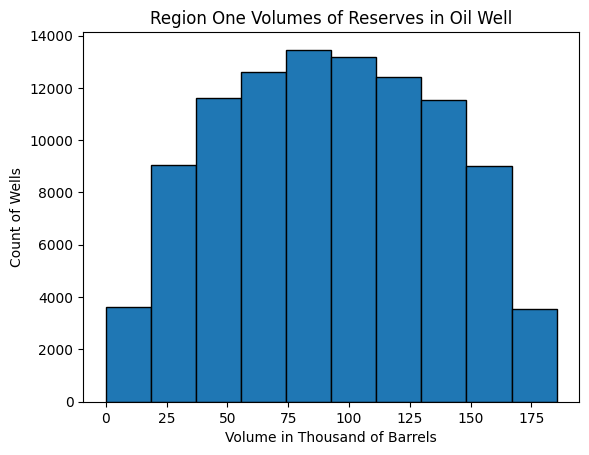

In [10]:
region_one['product'].plot(
kind='hist',
title="Region One Volumes of Reserves in Oil Well",
edgecolor="black")
plt.xlabel("Volume in Thousand of Barrels")
plt.ylabel("Count of Wells")

plt.show()

Looking at the data for region one, after examining some columns in the data, it looks like the data can be considered a normal distribution because the histogram has a symmetrical bell shaped curve. Also, there are no missing values and there are no duplicated values in the dataset.

### Region Two

In [11]:
region_two

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


In [12]:
region_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [13]:
region_two.isnull().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [14]:
region_two.duplicated().sum()

0

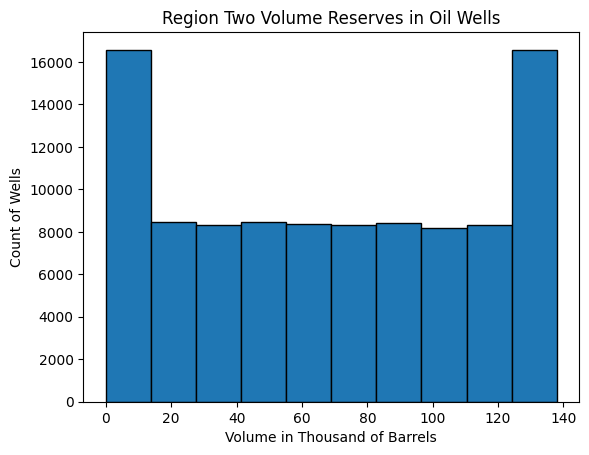

In [15]:
region_two['product'].plot(
kind='hist',
title="Region Two Volume Reserves in Oil Wells",
edgecolor='black')
plt.xlabel("Volume in Thousand of Barrels")
plt.ylabel("Count of Wells")
plt.show()

Looking at the product column in the region two dataset, you can see that the histrogram has two distinct peaks, which we consider a bimodal distribution. In this dataset, there are no missing values and no duplicate values.

### Region Three

In [16]:
region_three

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


In [17]:
region_three.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [18]:
region_three.isnull().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [19]:
region_three.duplicated().sum()

0

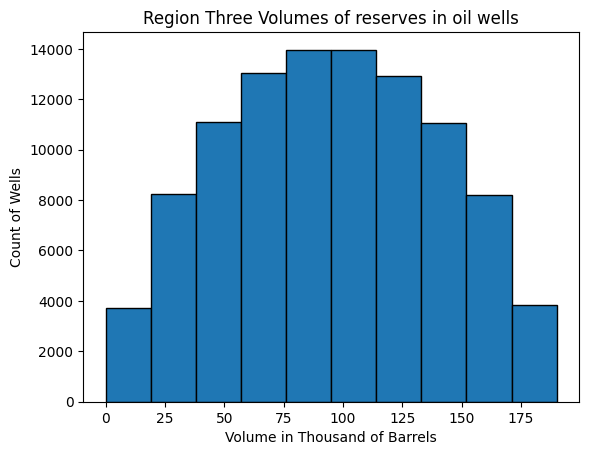

In [20]:
region_three['product'].plot(
kind='hist',
title= "Region Three Volumes of reserves in oil wells",
edgecolor='black')
plt.xlabel("Volume in Thousand of Barrels")
plt.ylabel("Count of Wells")
plt.show()

Just like in region one, region three also has a normal distribution because it is symmetrical bell shaped curve. In this dataset, there are no missing values and no duplicate values.

## Splitting the data into Training and Test for each Region into 75:25 ratio

### Region One

In [21]:
random_state = 10

In [22]:
features_one = region_one.drop(['product', 'id'], axis=1)
target_one = region_one['product']

X_train_one, X_valid_one, y_train_one, y_valid_one = train_test_split(features_one, target_one, test_size=0.25, random_state=random_state)

### Region Two

In [23]:
features_two = region_two.drop(["product", 'id'], axis=1)
target_two = region_two['product']

X_train_two, X_valid_two, y_train_two, y_valid_two = train_test_split(features_two, target_two, test_size=0.25, random_state=random_state)

### Region Three

In [24]:
features_three = region_three.drop(['product', 'id'], axis=1)
target_three = region_three['product']

X_train_three, X_valid_three, y_train_three, y_valid_three = train_test_split(features_three, target_three, test_size=0.25, random_state=random_state)

## Linear Regression Models

### Region One

In [25]:
model_one = LinearRegression()
model_one.fit(X_train_one, y_train_one)
prediction_one = model_one.predict(X_valid_one)
mse_one = mean_squared_error(y_valid_one, prediction_one)
rsme_one = np.sqrt(mse_one)
print(f"RSME for region one: {rsme_one:.2f}")

RSME for region one: 37.85


In [26]:
region_one['product'].describe()

count    100000.000000
mean         92.500000
std          44.288691
min           0.000000
25%          56.497507
50%          91.849972
75%         128.564089
max         185.364347
Name: product, dtype: float64

### Region Two

In [27]:
model_two = LinearRegression()
model_two.fit(X_train_two, y_train_two)
prediction_two = model_two.predict(X_valid_two)
mse_two = mean_squared_error(y_valid_two, prediction_two)
rsme_two = np.sqrt(mse_two)
print(f"RSME For region two: {rsme_two:.2f}")

RSME For region two: 0.89


In [28]:
region_two['product'].describe()

count    100000.000000
mean         68.825000
std          45.944423
min           0.000000
25%          26.953261
50%          57.085625
75%         107.813044
max         137.945408
Name: product, dtype: float64

### Region Three

In [29]:
model_three = LinearRegression()
model_three.fit(X_train_three, y_train_three)
prediction_three = model_three.predict(X_valid_three)
mse_three = mean_squared_error(y_valid_three, prediction_three)
rsme_three = np.sqrt(mse_three)
print(f"RSME for region three: {rsme_three:.2f}")

RSME for region three: 40.05


In [30]:
region_three['product'].describe()

count    100000.000000
mean         95.000000
std          44.749921
min           0.000000
25%          59.450441
50%          94.925613
75%         130.595027
max         190.029838
Name: product, dtype: float64

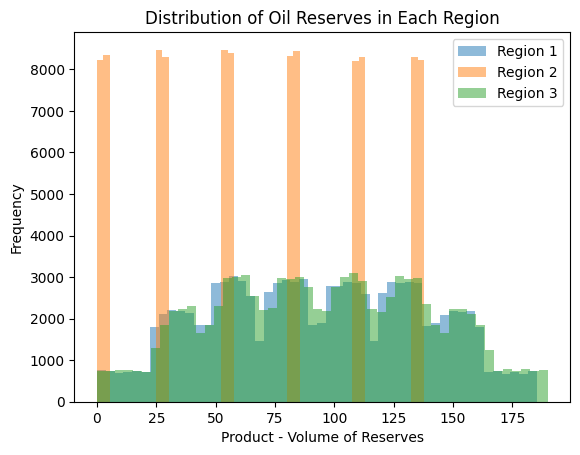

In [31]:
plt.hist(region_one['product'], bins=50, alpha=0.5, label='Region 1')
plt.hist(region_two['product'], bins=50, alpha=0.5, label='Region 2')
plt.hist(region_three['product'], bins=50, alpha=0.5, label='Region 3')
plt.legend(loc='upper right')
plt.xlabel('Product - Volume of Reserves')
plt.ylabel('Frequency')
plt.title('Distribution of Oil Reserves in Each Region')
plt.show()

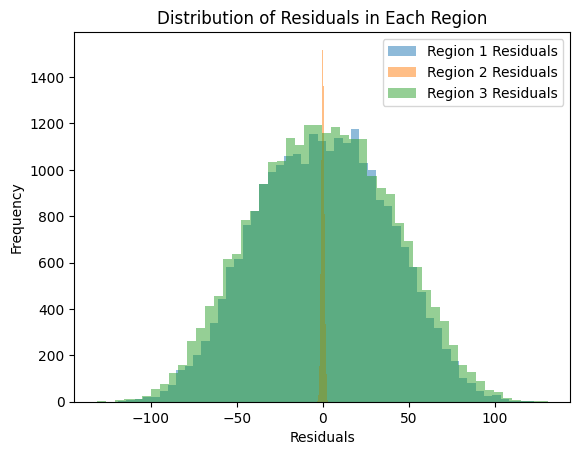

In [32]:
residuals_one = y_valid_one - prediction_one
residuals_two = y_valid_two - prediction_two
residuals_three = y_valid_three - prediction_three

plt.hist(residuals_one, bins=50, alpha=0.5, label='Region 1 Residuals')
plt.hist(residuals_two, bins=50, alpha=0.5, label='Region 2 Residuals')
plt.hist(residuals_three, bins=50, alpha=0.5, label='Region 3 Residuals')
plt.legend(loc='upper right')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals in Each Region')
plt.show()

By looking at the residuals plot, after creating my LinearRegression models, you can see that region two has very little difference between the actual values of a target variable and the predicted values. While region one and region three are more dispersed, meaning there is more errors between the actual data and the predicted data, that's why the RSME for region 1 and region 3 are high, and region two is low.

## Profit Calculation

According to the information we have of the oil wells, the budget for 200 oil wells is 100,000,000 for 200 oil wells, so we specify a variable for budget and number of wells. One barrel of raw material brings in a revenue of 4.5 USD. If you take the revenue of 4.5 in a thousand barrels, since the product column is measured in the thousands, you multiply the revenue per unit, multiplied by a 1000 to give you the revenue per thousand barrels.

To see what the break even volume, we must divide the cost per well divided by the revenue per thousand barrers to output the break even volume. In this case, the break even volume is 111.11 thousand barrels.

Next, we specified the average volume per region, which turns out to be Region 1: 92.50 thousand barrels, Region 2: 68.83 thousand barrels, and Region 3: 95.00 thousand barrels.

After seeing the average volume per region, I created a function that compares the volumes and outputs if the regions are profitable. Turns out, that none of the regions are profitable according to the datasets.

In [33]:
budget = 100_000_000 
num_wells = 200
revenue_per_unit = 4.5  

In [34]:

cost_per_well = budget / num_wells

revenue_per_thousand_barrels = revenue_per_unit * 1000

break_even_volume = cost_per_well / revenue_per_thousand_barrels

print(f"Break-even volume per well: {break_even_volume:.2f} thousand barrels")

Break-even volume per well: 111.11 thousand barrels


In [35]:
avg_volume_region_1 = region_one['product'].mean()
avg_volume_region_2 = region_two['product'].mean()
avg_volume_region_3 = region_three['product'].mean()

print(f"Avg volume Region 1: {avg_volume_region_1:.2f} thousand barrels")
print(f"Avg volume Region 2: {avg_volume_region_2:.2f} thousand barrels")
print(f"Avg volume Region 3: {avg_volume_region_3:.2f} thousand barrels")

Avg volume Region 1: 92.50 thousand barrels
Avg volume Region 2: 68.83 thousand barrels
Avg volume Region 3: 95.00 thousand barrels


In [36]:
def compare_volumes(region_name, avg_volume, break_even_volume):
    if avg_volume >= break_even_volume:
        return f"{region_name}: Profitable"
    else:
        return f"{region_name}: Not Profitable"

print(compare_volumes("Region 1", avg_volume_region_1, break_even_volume))
print(compare_volumes("Region 2", avg_volume_region_2, break_even_volume))
print(compare_volumes("Region 3", avg_volume_region_3, break_even_volume))

Region 1: Not Profitable
Region 2: Not Profitable
Region 3: Not Profitable


## Calculating Profit from Selected oil wells and Model Predictions:

In [37]:
def profit(target, predictions, count):
    target = target.values
    top_oil_wells = np.argsort(predictions)[::-1][:count]
    total_reserves = np.sum(target[top_oil_wells])
    total_revenue = total_reserves * 4500
    total_profit = total_revenue - budget
    return total_profit

profit_one = profit(y_valid_one, prediction_one, 200)
profit_two = profit(y_valid_two, prediction_two, 200)
profit_three = profit(y_valid_three, prediction_three, 200)

In [38]:
print(f"""The profit from selected oil wells and model predictions from:
Region 1: {profit_one:.2f}
Region 2: {profit_two:.2f}
Region 3: {profit_three:.2f}.""")
print()
print(f"The Region with the highest profit is Region 1 with {profit_one:.2f}")

The profit from selected oil wells and model predictions from:
Region 1: 33878788.72
Region 2: 24150866.97
Region 3: 24318900.21.

The Region with the highest profit is Region 1 with 33878788.72


## Calculating Risk and Profit Using Bootstrap

In [109]:
state = np.random.RandomState(10)


def bootstrap(validate_features, validate_target, model, n_bootstraps, n_wells):
    profits = []
    for _ in range(n_bootstraps):
        subsample_indices = state.choice(validate_features.index, size=500, replace=True)
        subsample_features = validate_features.loc[subsample_indices]
        subsample_target = validate_target.loc[subsample_indices]
        subsample_predictions = model.predict(subsample_features)
        profit_value = profit(subsample_target, subsample_predictions, n_wells)
        profits.append(profit_value)

    profits = pd.Series(profits)
    lower = profits.quantile(0.025)
    upper = profits.quantile(0.975) 
    average_profit = profits.mean()
    risk_loss = (profits < 0).mean() * 100  
    
    print(f"""
    Lower Quantile: {lower:.2f}
    Upper Quantile: {upper:.2f}
    Average Profit: {average_profit:.2f}
    Risk Loss Percentage: {risk_loss:.2f}%""")


In [118]:
print("Region 1")
bootstrap(X_valid_one, y_valid_one, model_one, 1000, 200)

Region 1

    Lower Quantile: -1039109.52
    Upper Quantile: 8947662.85
    Average Profit: 3761771.75
    Risk Loss Percentage: 6.80%


In [117]:
print("Region 2")
bootstrap(X_valid_two, y_valid_two, model_two, 1000, 200)

Region 2

    Lower Quantile: 492522.88
    Upper Quantile: 8687459.75
    Average Profit: 4714485.83
    Risk Loss Percentage: 1.50%


In [119]:
print("Region 3")
bootstrap(X_valid_three, y_valid_three, model_three, 1000, 200)

Region 3

    Lower Quantile: -1559348.26
    Upper Quantile: 9047834.51
    Average Profit: 3593006.01
    Risk Loss Percentage: 9.60%


## Conclusion

According to the risk loss of all three regions, the recommended for developement of oil wells in Region 2, because after conducting the profit and risk loss percentage, region 2 is the region with the highest average profit, and the least percentage of loss.